In [2]:
# First project (guided)

# Based on the article: https://fivethirtyeight.com/features/fandango-movies-ratings/

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fdgo = pd.read_csv('fandango_scrape.csv')

In [4]:
fdgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fdgo.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fdgo.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [7]:
import warnings
warnings.simplefilter(action='ignore')

# To suppress Warnings

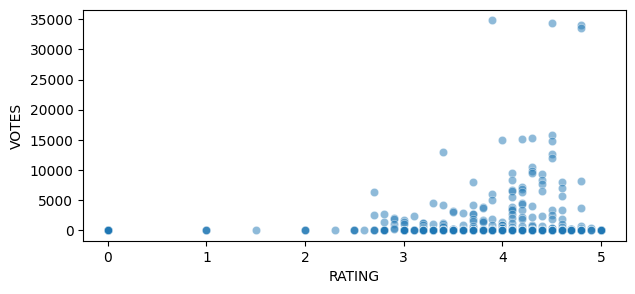

In [8]:
# Looking at relationship b/w popularity & rating of a film. A more popular film will have more votes.

plt.figure(figsize=(7,3))
sns.scatterplot(data=fdgo,y='VOTES',x='RATING',alpha=0.5)
plt.show()

In [9]:
# Finding the correlation between the columns - STARS and RATING are not perfectly correlated.

fdgo.select_dtypes(include='number').corr()     # Taking only numerical columns from data frame

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [10]:
# Extracting the year from the FILM column. General format of film name: Film Name (Year)

fdgo['YEAR'] = fdgo['FILM'].apply(lambda x: x.split('(')[-1].replace(')',''))
fdgo['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [11]:
# Counting number of movies per year.

fdgo['YEAR'].value_counts(ascending=False)

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

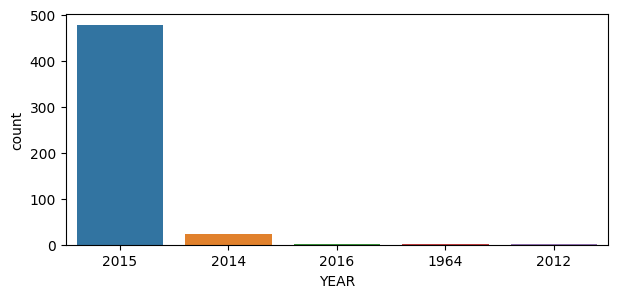

In [12]:
# Plotting movie count per year

plt.figure(figsize=(7,3))
sns.countplot(data=fdgo,x='YEAR')

In [13]:
# Top 10 most popular movies. (most VOTES)

fdgo.nlargest(10,'VOTES')
# fdgo.sort_values(by=['VOTES'],ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [14]:
# Count of movies with 0 VOTES

len(fdgo[fdgo['VOTES']==0])

69

In [15]:
# Creating a new data frame containing only reviewed films.

fdgo_rev = fdgo[fdgo['VOTES']>0]
fdgo_rev

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


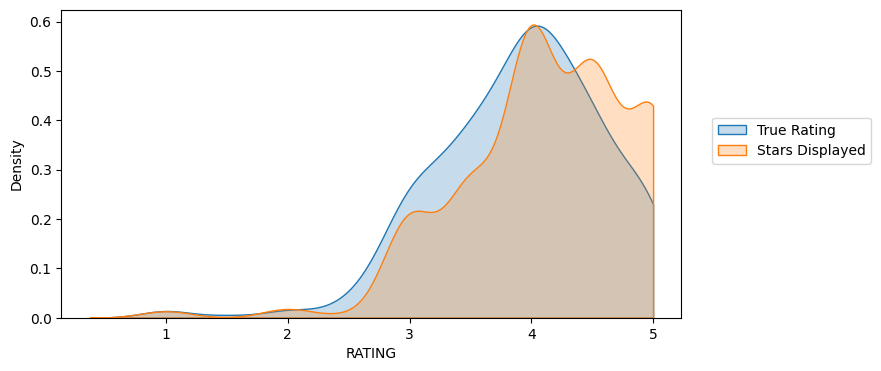

In [16]:
# Creating KDE plots for user rating and stars for comparison. Plot shows some discrepancy between the two rating systems.

plt.figure(figsize=(8,4))
sns.kdeplot(data=fdgo_rev, x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fdgo_rev, x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))
plt.show()

In [17]:
# Qunatifying the discrepancy observed in previous plot - Finding differences between STARS and RATING

fdgo_rev['STARS-RATING'] = fdgo_rev['STARS']-fdgo_rev['RATING']
fdgo_rev['STARS-RATING'] = fdgo_rev['STARS-RATING'].round(2)
fdgo_rev['STARS-RATING']

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: STARS-RATING, Length: 435, dtype: float64

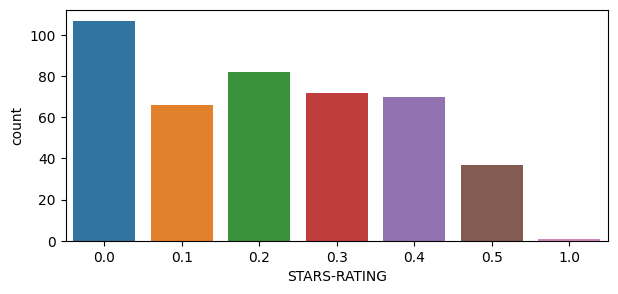

In [18]:
# Creating a countplot to visualise the frequency of the differences between STARS and RATING. 
# One or more movies have a STAR and RATING differnce of 1.

plt.figure(figsize=(7,3))
sns.countplot(data=fdgo_rev,x='STARS-RATING')
plt.show()

In [19]:
print("No. movies with STARS-RATING = 0:",len(fdgo_rev[fdgo_rev['STARS-RATING']==0]))
print("No. movies with STARS-RATING > 0:",len(fdgo_rev[fdgo_rev['STARS-RATING']>0]))


No. movies with STARS-RATING = 0: 107
No. movies with STARS-RATING > 0: 328


In [20]:
# Finding movie(s) with STAR-RATING = 1.0

fdgo_rev[fdgo_rev['STARS-RATING']>=1]

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [21]:
# To compare Fandango ratings with ratings from other sites. Importing data.

other = pd.read_csv("all_sites_scores.csv")
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [22]:
other.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


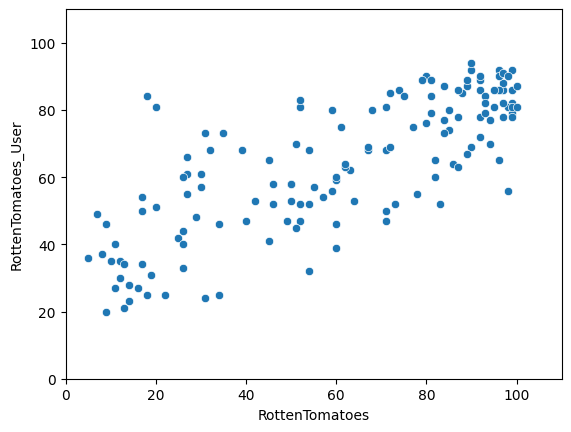

In [23]:
# Rotten Tomatoes - See relationship between critic and user reviews.

sns.scatterplot(data=other,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,110)
plt.xlim(0,110)
plt.show()

In [24]:
# Creating a new column to see the difference between Rotten Tomatoes user and critc ratings.

other['RT_critics-RT_users'] = other['RottenTomatoes']-other['RottenTomatoes_User']
other['RT_critics-RT_users']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: RT_critics-RT_users, Length: 146, dtype: int64

In [25]:
# Calculating the Mean Absolute Difference between RT user and critc reviews to see the average difference in ratings.

other.reset_index(drop=True)
other['RT_critics-RT_users'].apply(abs).mean()

15.095890410958905

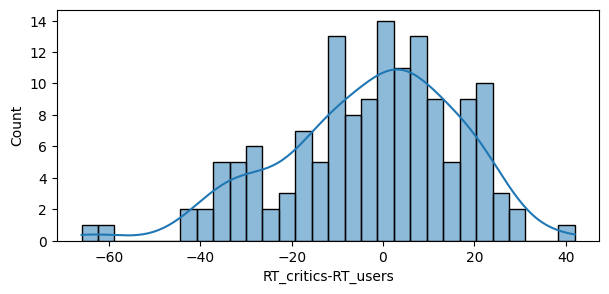

In [26]:
# Plotting the distribution of differences and absolute differences between RT critcs and user ratings.

plt.figure(figsize=(7,3))
sns.histplot(data=other,x='RT_critics-RT_users',kde=True,bins=30)
plt.show()

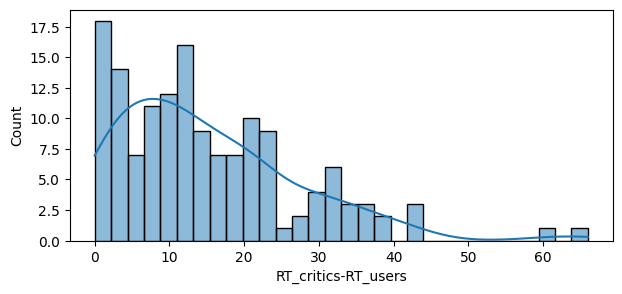

In [27]:
plt.figure(figsize=(7,3))
sns.histplot(x=other['RT_critics-RT_users'].apply(abs),kde=True,bins=30)
plt.show()

In [28]:
# Finding out top 5 movies in RT where user rating > critics rating - Films that users liked but critics didn't.

other.nsmallest(5,'RT_critics-RT_users')[['FILM','RT_critics-RT_users']]

,FILM,RT_critics-RT_users
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [29]:
# Top 5 films that critics liked but users didn't.

other.nlargest(5,'RT_critics-RT_users')[['FILM','RT_critics-RT_users']]

,FILM,RT_critics-RT_users
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


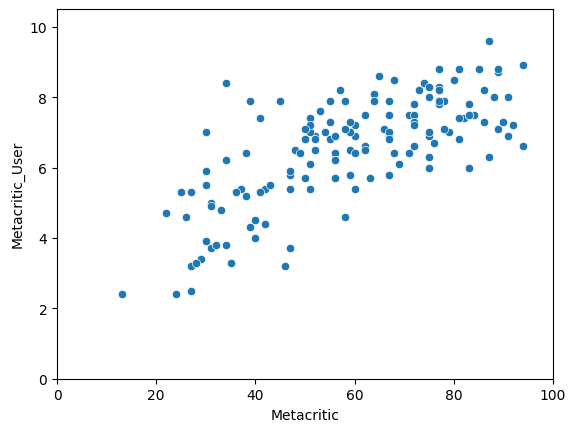

In [30]:
# Comparing MetaCritic user and critic ratings
plt.xlim(0,100)
plt.ylim(0,10.5)
sns.scatterplot(data=other,x='Metacritic',y='Metacritic_User')
plt.show()

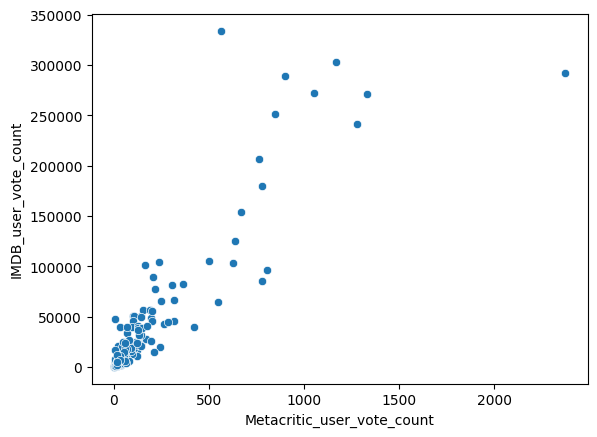

In [31]:
# Comparing vote counts on Metacritic and IMDB

sns.scatterplot(data=other,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')
plt.show()

In [32]:
# Finding out the outlier - movie with highest number of votes on IMDB

other.nlargest(1,'IMDB_user_vote_count')[['FILM','Metacritic_user_vote_count','IMDB_user_vote_count']]

,FILM,Metacritic_user_vote_count,IMDB_user_vote_count
14,The Imitation Game (2014),566,334164


In [33]:
# Finding out the outlier - movie with highest number of votes on Metacritic

other.nlargest(1,'Metacritic_user_vote_count')[['FILM','Metacritic_user_vote_count','IMDB_user_vote_count']]

,FILM,Metacritic_user_vote_count,IMDB_user_vote_count
88,Mad Max: Fury Road (2015),2375,292023


In [34]:
# Create new data frame combining Fandango and other site ratings. other (data frame) contains movies with atleast 30 Fandango ratings.

comb = pd.merge(fdgo,other,on='FILM',how='inner')
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RT_critics-RT_users         145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [35]:
# Normailizing ratings so that all are on 0-5 scale

import numpy as np

comb['RottenTomatoes_Norm'] = np.round(comb['RottenTomatoes']/20,1)
comb['RottenTomatoes_User_Norm'] = np.round(comb['RottenTomatoes_User']/20,1)
comb['Metacritic_Norm'] = np.round(comb['Metacritic']/20,1)
comb['Metacritic_User_Norm'] = np.round(comb['Metacritic_User']/2,1)
comb['IMDB_Norm'] = np.round(comb['IMDB']/2,1)

In [36]:
# Creating a new data frame containing all normalized ratings.

comb_norm = comb[['STARS', 'RATING','RottenTomatoes_Norm',
       'RottenTomatoes_User_Norm', 'Metacritic_Norm', 'Metacritic_User_Norm',
       'IMDB_Norm']]

In [37]:
comb_norm.head()

,STARS,RATING,RottenTomatoes_Norm,RottenTomatoes_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


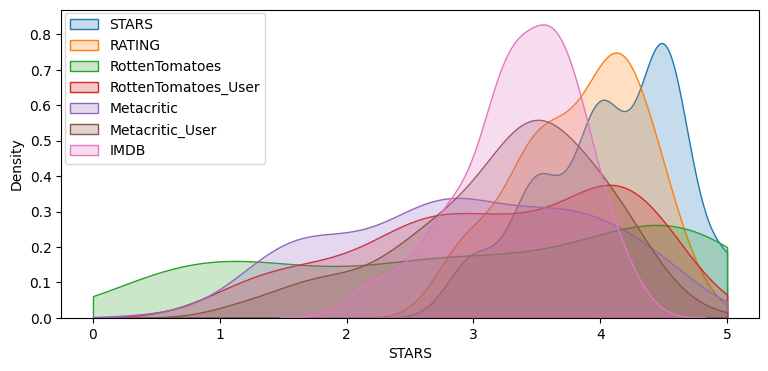

In [52]:
# Comparing ratings across all sites using density plots. It is seen tha Fandango ratings are much more
# higher on average when compared to ratings on other sites.

plt.figure(figsize=(9,4))
sns.kdeplot(data=comb_norm,x='STARS',label='STARS',fill=True,clip=[0,5])
sns.kdeplot(data=comb_norm,x='RATING',label='RATING',fill=True,clip=[0,5])
sns.kdeplot(data=comb_norm,x='RottenTomatoes_Norm',label='RottenTomatoes',fill=True,clip=[0,5])
sns.kdeplot(data=comb_norm,x='RottenTomatoes_User_Norm',label='RottenTomatoes_User',fill=True,clip=[0,5])
sns.kdeplot(data=comb_norm,x='Metacritic_Norm',label='Metacritic',fill=True,clip=[0,5])
sns.kdeplot(data=comb_norm,x='Metacritic_User_Norm',label='Metacritic_User',fill=True,clip=[0,5])
sns.kdeplot(data=comb_norm,x='IMDB_Norm',label='IMDB',fill=True,clip=[0,5])

plt.legend(loc=(0.005,0.5))
plt.show()

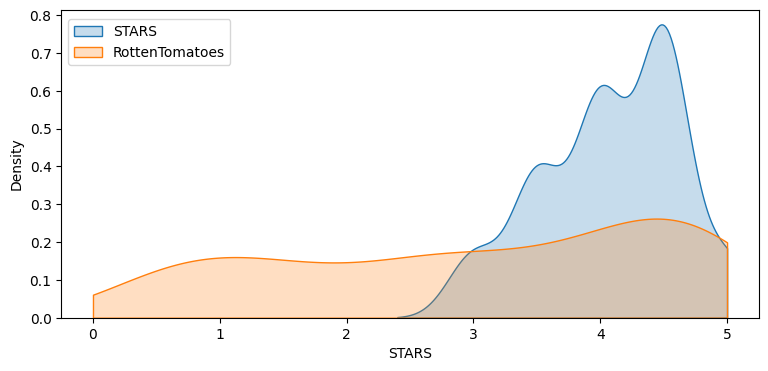

In [56]:
# Comparing ratings from Rotten Tomatoes and STARS from Fandango

plt.figure(figsize=(9,4))
sns.kdeplot(data=comb_norm,x='STARS',label='STARS',fill=True,clip=[0,5])
sns.kdeplot(data=comb_norm,x='RottenTomatoes_Norm',label='RottenTomatoes',fill=True,clip=[0,5])
plt.legend(loc=(0.01,0.82))
plt.show()

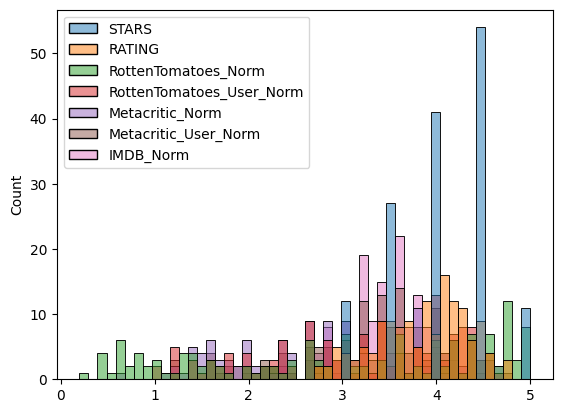

In [60]:
# Plotting histplot to compare all normalized scores.

sns.histplot(data=comb_norm,bins=50)
plt.show()

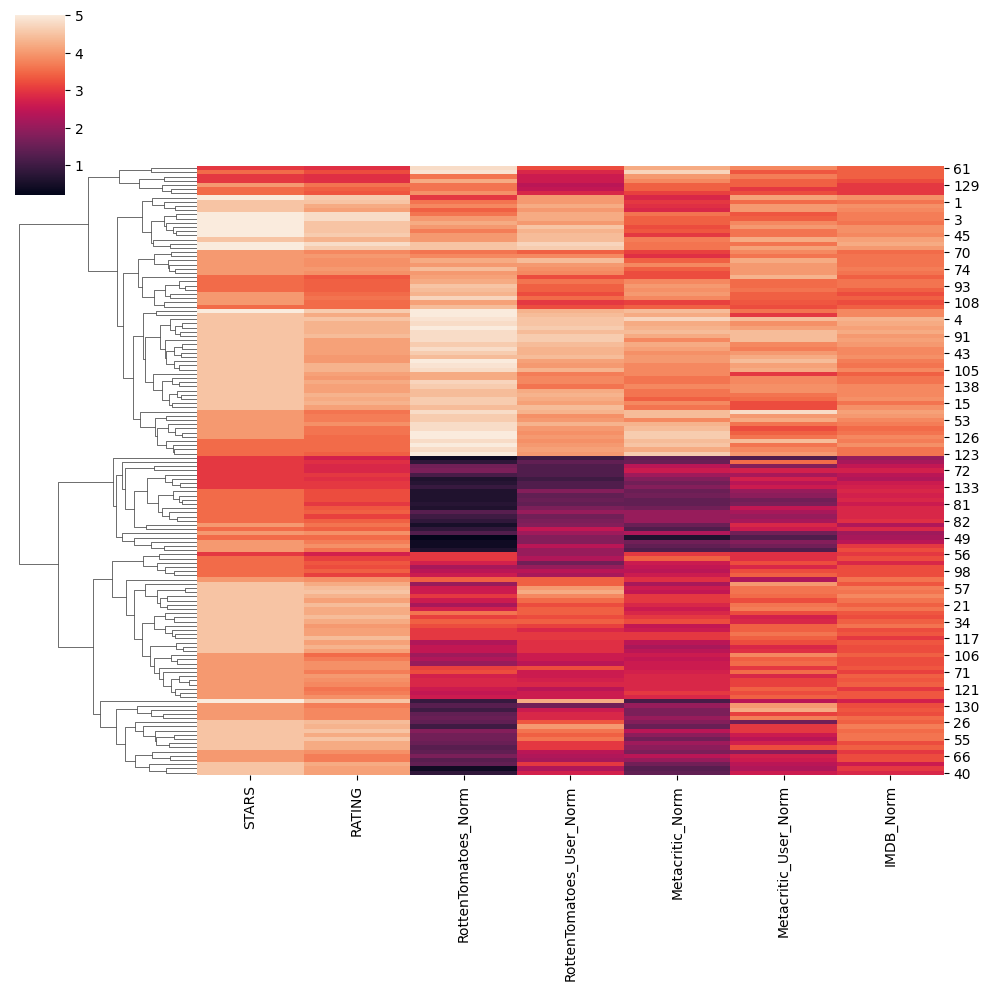

In [62]:
# Creating a cluster map to see the worst rated shows. Fandango ratings for poorly rated movies are
# considerably higher as seen from the plot.

sns.clustermap(comb_norm,col_cluster=False)
plt.show()

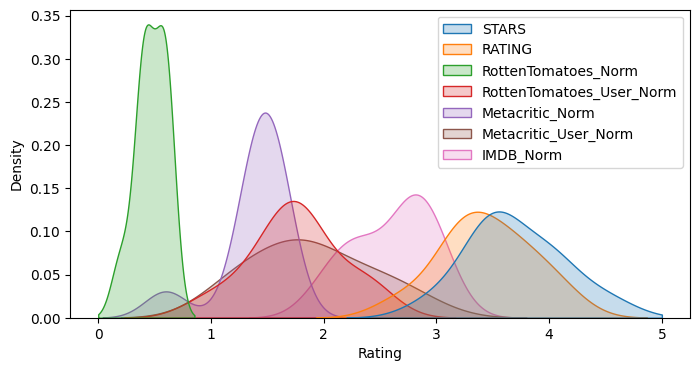

In [70]:
# Comparing the ratings of the 10 worst movies (according to RT)

comb_norm['FILM'] = comb['FILM']
comb_norm.reset_index(drop=True)
# comb_norm.head()
worst_comb = comb_norm.nsmallest(10,'RottenTomatoes_Norm')

plt.figure(figsize=(8,4))
sns.kdeplot(data=worst_comb,shade=True,clip=[0,5])
plt.xlabel('Rating')
plt.show()